In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


# Problema 8

In [2]:
N = int(1e5)  # Number of experiments


In [3]:
def coin_toss():
    """Simulate a coin toss experiment"""
    result = []
    for _ in range(4):  # Toss 4 coins simultaneously
        outcome = random.choice(['H', 'T'])  # 'H' for heads, 'T' for tails
        result.append(outcome)
    return result


In [4]:
# Perform the virtual experiment
count = 0  # Count the number of times two heads and two tails occur
for _ in range(N):
    outcome = coin_toss()
    if outcome.count('H') == 2 and outcome.count('T') == 2:
        count += 1

In [5]:
# Calculate the probability
probability = count / N

print(f"Calculated probability: {probability} \n Theoretical probability: 3/8 = {3/8}")

Calculated probability: 0.37575 
 Theoretical probability: 3/8 = 0.375


# Ejercicio 9

<img src="https://i3.lensdump.com/i/kcMfOe.png" alt="kcMfOe.png" border="0" />

<img src="https://i2.lensdump.com/i/kcMyVK.png" alt="kcMyVK.png" border="0" />

Teniendo en cuenta todas las combinaciones posibles, observamos que hay seis formas de lograr el Evento A:

- cara-cara-cruz-cruz
- cara-cruz-cara-cruz
- cara-cruz-cruz-cara
- cruz-cara-cara-cruz
- cruz-cara-cruz-cara
- cruz-cruz-cara-cara

Asi, la expresion de probabilidad estaria dada pro la siguiente ecuacion:

$  P(A) = (p_1 \cdot p_2 \cdot (1-p_1) \cdot (1-p_2)) + (p_1 \cdot (1-p_2) \cdot (1-p_1) \cdot p_2) + ((1-p_1) \cdot p_2 \cdot p_1 \cdot (1-p_2)) + ((1-p_1) \cdot (1-p_2) \cdot p_1 \cdot p_2) + (p_2 \cdot p_1 \cdot (1-p_2) \cdot (1-p_1)) + ((1-p_2) \cdot (1-p_1) \cdot p_2 \cdot p_1)  $


Minimum Probability:
Probability: 0.04859999999999999
p1: 0.9
p2: 0.1
Maximum Probability:
Probability: 0.37497551270278545
p1: 0.49595959595959593
p2: 0.5


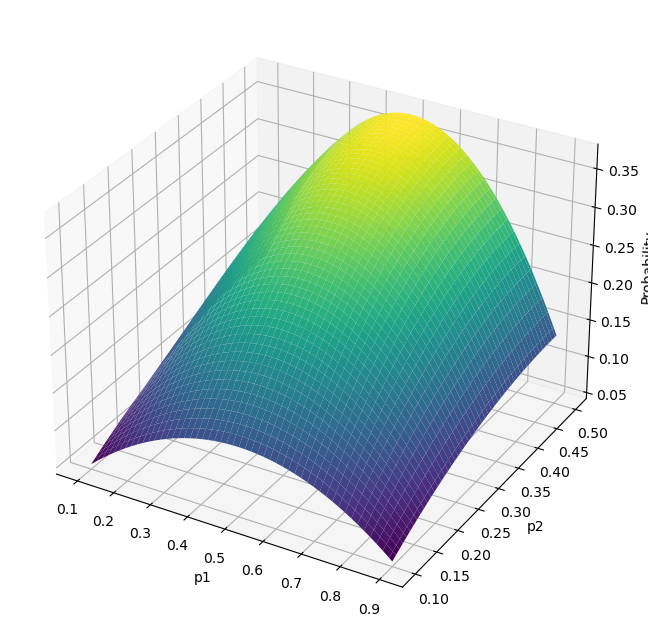

In [11]:
# Define the range of P1 and p2 values
p1_values = np.linspace(0.1, 0.9, 100)
p2_values = np.linspace(0.1, 0.5, 100)

# Create a meshgrid of p1 and p2 values
P1, P2 = np.meshgrid(p1_values, p2_values)

# Calculate the probabilities using the expression derived from the probability tree
probabilities = (P1 * P2 * (1 - P1) * (1 - P2)) + (P1 * (1 - P2) * (1 - P1) * P2) + \
         ((1 - P1) * P2 * P1 * (1 - P2)) + ((1 - P1) * (1 - P2) * P1 * P2) + \
         (P2 * P1 * (1 - P2) * (1 - P1)) + ((1 - P2) * (1 - P1) * P2 * P1)

# Find the minimum and maximum probabilities along with their corresponding p1 and p2 values
min_prob = np.min(probabilities)
min_index = np.unravel_index(np.argmin(probabilities), probabilities.shape)
min_p1 = P1[min_index]
min_p2 = P2[min_index]

max_prob = np.max(probabilities)
max_index = np.unravel_index(np.argmax(probabilities), probabilities.shape)
max_p1 = P1[max_index]
max_p2 = P2[max_index]

# Print the minimum and maximum probabilities and their corresponding p1 and p2 values
print("Minimum Probability:")
print("Probability:", min_prob)
print("p1:", min_p1)
print("p2:", min_p2)

print("Maximum Probability:")
print("Probability:", max_prob)
print("p1:", max_p1)
print("p2:", max_p2)

# Create a 3D plot of the probability surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(P1, P2, probabilities, cmap='viridis')
ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('Probability')
plt.show()